In [3]:
import pandas as pd  # For data manipulation and DataFrame handling
import numpy as np  # For numerical operations and handling missing values
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling (optional for decision trees)
from sklearn.impute import SimpleImputer  # For handling missing values
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For more advanced plotting
from sklearn.tree import plot_tree  # For visualizing the decision tree
from sklearn.preprocessing import MinMaxScaler

import csv
import os

In [4]:
#Opening the dataset
dataset = '../data/raw/ImmoEliza_dataset_no_nan.csv'
df = pd.read_csv(dataset)
print(df.head())
df.isnull().sum()
df['municipality_code'] = df['municipality_code'].astype('int')
df['facades'] = df['facades'].astype('int')
df.drop(['price_sqm'], axis=1, inplace=True)
#df.drop(['postal_code'], axis=1, inplace=True)
df.drop(['municipality_code'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.dtypes

   Unnamed: 0  bedrooms  postal_code  kitchen  facades     price  furnished  \
0           0         2         3000        1      2.0  299500.0          0   
1           1         3         9950        1      2.0  360000.0          0   
2           2         1         2140        1      2.0  145000.0          0   
3           3         5         6838        1      2.0  149500.0          0   
4           4         2         4460        1      2.0  179000.0          0   

   terrace  fireplace  garden  ...  chalet  as_new  good  just_renovated  \
0        0          0       1  ...       0       0     0               0   
1        0          0       0  ...       0       0     0               1   
2        0          0       0  ...       0       0     1               0   
3        1          0       1  ...       0       0     0               0   
4        0          0       1  ...       0       0     0               0   

   to_be_done_up  to_renovate  to_restore    price_sqm  is_apartment

bedrooms                  int64
postal_code               int64
kitchen                   int64
facades                   int64
price                   float64
furnished                 int64
terrace                   int64
fireplace                 int64
garden                    int64
gardensurface             int64
pool                      int64
livingarea              float64
surfaceoftheplot        float64
apartment_block           int64
ground_floor              int64
country_cottage           int64
mansion                   int64
penthouse                 int64
exceptional_property      int64
kot                       int64
loft                      int64
manor_house               int64
service_flat              int64
chalet                    int64
as_new                    int64
good                      int64
just_renovated            int64
to_be_done_up             int64
to_renovate               int64
to_restore                int64
is_apartment              int64
is_house

In [5]:
df.dtypes

bedrooms                  int64
postal_code               int64
kitchen                   int64
facades                   int64
price                   float64
furnished                 int64
terrace                   int64
fireplace                 int64
garden                    int64
gardensurface             int64
pool                      int64
livingarea              float64
surfaceoftheplot        float64
apartment_block           int64
ground_floor              int64
country_cottage           int64
mansion                   int64
penthouse                 int64
exceptional_property      int64
kot                       int64
loft                      int64
manor_house               int64
service_flat              int64
chalet                    int64
as_new                    int64
good                      int64
just_renovated            int64
to_be_done_up             int64
to_renovate               int64
to_restore                int64
is_apartment              int64
is_house

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of numerical columns (adjust as needed)
numerical_columns = ['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface', 'facades']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [7]:
df.columns

Index(['bedrooms', 'postal_code', 'kitchen', 'facades', 'price', 'furnished',
       'terrace', 'fireplace', 'garden', 'gardensurface', 'pool', 'livingarea',
       'surfaceoftheplot', 'apartment_block', 'ground_floor',
       'country_cottage', 'mansion', 'penthouse', 'exceptional_property',
       'kot', 'loft', 'manor_house', 'service_flat', 'chalet', 'as_new',
       'good', 'just_renovated', 'to_be_done_up', 'to_renovate', 'to_restore',
       'is_apartment', 'is_house'],
      dtype='object')

In [8]:
'''
# Filter out municipality codes with fewer than 10 occurrences
municipality_code_counts = df['municipality_code'].value_counts()
valid_municipality_codes = municipality_code_counts[municipality_code_counts >= 30].index

# Create a filtered DataFrame
df = df[df['municipality_code'].isin(valid_municipality_codes)]

# Print the result
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df.shape}")
'''

'\n# Filter out municipality codes with fewer than 10 occurrences\nmunicipality_code_counts = df[\'municipality_code\'].value_counts()\nvalid_municipality_codes = municipality_code_counts[municipality_code_counts >= 30].index\n\n# Create a filtered DataFrame\ndf = df[df[\'municipality_code\'].isin(valid_municipality_codes)]\n\n# Print the result\nprint(f"Original DataFrame shape: {df.shape}")\nprint(f"Filtered DataFrame shape: {df.shape}")\n'

In [9]:

# Filter out postal codes with fewer than 10 occurrences
postal_code_counts = df['postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 20].index

# Create a filtered DataFrame
df = df[df['postal_code'].isin(valid_postal_codes)]

# Print the result
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df.shape}")


Original DataFrame shape: (8841, 32)
Filtered DataFrame shape: (8841, 32)


In [10]:
df.columns

Index(['bedrooms', 'postal_code', 'kitchen', 'facades', 'price', 'furnished',
       'terrace', 'fireplace', 'garden', 'gardensurface', 'pool', 'livingarea',
       'surfaceoftheplot', 'apartment_block', 'ground_floor',
       'country_cottage', 'mansion', 'penthouse', 'exceptional_property',
       'kot', 'loft', 'manor_house', 'service_flat', 'chalet', 'as_new',
       'good', 'just_renovated', 'to_be_done_up', 'to_renovate', 'to_restore',
       'is_apartment', 'is_house'],
      dtype='object')

In [11]:

#df = pd.get_dummies(df, columns=['municipality_code'], drop_first=False)
df = pd.get_dummies(df, columns=['postal_code'], drop_first=False)


In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for relevant columns
Q1 = df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface']].quantile(0.15)
Q3 = df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface']].quantile(0.85)
IQR = Q3 - Q1

# Define the outlier condition: values outside 1.5 * IQR
outliers_condition = ((df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface']] < (Q1 - 1.5 * IQR)) | 
                      (df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface']] > (Q3 + 1.5 * IQR)))

# Remove rows where any of the relevant columns contain outliers
df = df[~outliers_condition.any(axis=1)]


In [13]:

'''from scipy.stats import zscore

# Calculate Z-scores for numeric columns
z_scores = df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface', 'facades']].apply(zscore)

# Define a threshold for Z-scores (e.g., 3)
threshold = 3.5

# Filter the dataframe, keeping only the rows where all Z-scores are below the threshold
df = df[(z_scores < threshold).all(axis=1)]'''


"from scipy.stats import zscore\n\n# Calculate Z-scores for numeric columns\nz_scores = df[['bedrooms', 'price', 'livingarea', 'surfaceoftheplot', 'gardensurface', 'facades']].apply(zscore)\n\n# Define a threshold for Z-scores (e.g., 3)\nthreshold = 3.5\n\n# Filter the dataframe, keeping only the rows where all Z-scores are below the threshold\ndf = df[(z_scores < threshold).all(axis=1)]"

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Features (all columns except 'price')
y = df['price']  # Target variable (price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and target back into DataFrames for X_train and X_test
df_train = X_train.copy()
df_train['price'] = y_train

df_test = X_test.copy()
df_test['price'] = y_test

# Check the shape of the splits
print(f"Training set size: {df_train.shape[0]} samples")
print(f"Test set size: {df_test.shape[0]} samples")


Training set size: 5841 samples
Test set size: 1461 samples


In [15]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.12
R-squared: 0.49


In [16]:
# Get feature importances
feature_importances = model.feature_importances_

# Sort and display the features by importance
important_features = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
print("Feature importances:")
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")


Feature importances:
livingarea: 0.3636
postal_code_8300: 0.2512
is_apartment: 0.0383
bedrooms: 0.0358
postal_code_8301: 0.0288
as_new: 0.0237
surfaceoftheplot: 0.0218
facades: 0.0174
terrace: 0.0124
kitchen: 0.0108
good: 0.0104
penthouse: 0.0094
to_be_done_up: 0.0090
postal_code_1050: 0.0084
postal_code_1150: 0.0083
gardensurface: 0.0079
furnished: 0.0072
postal_code_9000: 0.0070
postal_code_1180: 0.0067
postal_code_1000: 0.0057
just_renovated: 0.0054
postal_code_8660: 0.0049
postal_code_8620: 0.0049
postal_code_2000: 0.0048
apartment_block: 0.0047
postal_code_8420: 0.0046
postal_code_3000: 0.0042
to_renovate: 0.0040
postal_code_8400: 0.0037
fireplace: 0.0029
postal_code_2650: 0.0029
postal_code_8000: 0.0026
postal_code_3500: 0.0026
postal_code_1160: 0.0025
postal_code_1200: 0.0021
postal_code_4000: 0.0019
postal_code_1040: 0.0019
postal_code_8870: 0.0016
postal_code_2018: 0.0015
postal_code_2930: 0.0015
garden: 0.0014
ground_floor: 0.0014
postal_code_1030: 0.0014
postal_code_8670: 0.

In [17]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)  # You can adjust n_estimators as needed

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.07
R-squared: 0.70


In [18]:
# Get feature importances
feature_importances = model.feature_importances_

# Print feature importances in descending order
for feature, importance in sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


livingarea: 0.3626
postal_code_8300: 0.2506
bedrooms: 0.0356
surfaceoftheplot: 0.0307
postal_code_8301: 0.0296
is_apartment: 0.0255
as_new: 0.0228
facades: 0.0130
kitchen: 0.0125
penthouse: 0.0120
terrace: 0.0115
good: 0.0099
postal_code_1050: 0.0091
postal_code_9000: 0.0085
postal_code_1150: 0.0076
furnished: 0.0073
gardensurface: 0.0069
to_renovate: 0.0067
postal_code_1000: 0.0065
postal_code_1180: 0.0063
to_be_done_up: 0.0056
postal_code_8620: 0.0054
postal_code_2000: 0.0053
is_house: 0.0052
postal_code_8660: 0.0047
postal_code_8400: 0.0046
just_renovated: 0.0046
postal_code_3000: 0.0042
postal_code_8000: 0.0040
postal_code_8420: 0.0037
postal_code_8670: 0.0035
apartment_block: 0.0030
postal_code_1200: 0.0028
postal_code_2650: 0.0025
fireplace: 0.0021
postal_code_1040: 0.0019
garden: 0.0019
postal_code_1160: 0.0019
postal_code_3500: 0.0019
ground_floor: 0.0018
postal_code_8800: 0.0015
postal_code_2600: 0.0014
postal_code_8430: 0.0014
postal_code_8870: 0.0014
postal_code_2018: 0.0012

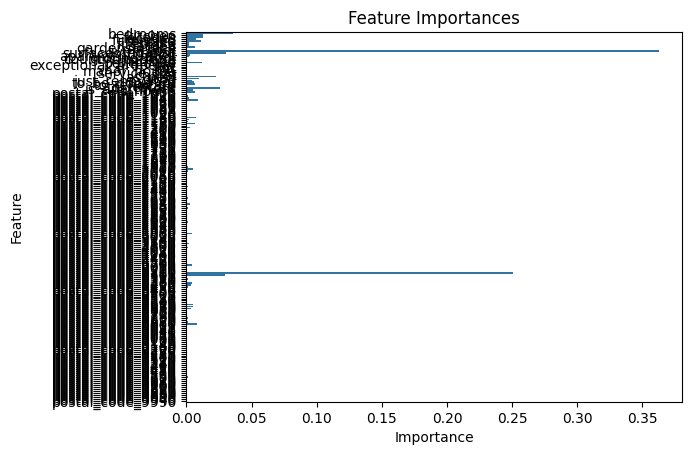

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature importances
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [20]:
'''# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size to your preference
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()
'''

'# Import necessary libraries\nfrom sklearn.tree import DecisionTreeRegressor, plot_tree\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Initialize the DecisionTreeRegressor model\nmodel = DecisionTreeRegressor(random_state=42)\n\n# Train the model using the training data\nmodel.fit(X_train, y_train)\n\n# Make predictions on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\n# Print the results\nprint(f"Mean Squared Error: {mse:.2f}")\nprint(f"R-squared: {r2:.2f}")\n\n# Visualize the decision tree\nplt.figure(figsize=(20, 10))  # Adjust the size to your preference\nplot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)\nplt.show()\n'